MNIST testing

ref: https://keras.io/examples/mnist_cnn/
https://www.pytorials.com/mnist-handwritten-digits-classification-using-keras/


In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (60000,)
y_test shape: (10000,)
60000 train samples
10000 test samples


In [7]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

W1102 22:06:16.851331 139685628299072 deprecation_wrapper.py:119] From /root/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1102 22:06:16.865724 139685628299072 deprecation_wrapper.py:119] From /root/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1102 22:06:16.867959 139685628299072 deprecation_wrapper.py:119] From /root/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1102 22:06:16.893993 139685628299072 deprecation_wrapper.py:119] From /root/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1102 22:06:16.896188 139685628

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

W1102 22:06:16.972301 139685628299072 deprecation_wrapper.py:119] From /root/miniconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1102 22:06:16.979945 139685628299072 deprecation_wrapper.py:119] From /root/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

W1102 22:06:17.136669 139685628299072 deprecation.py:323] From /root/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2596 - acc: 0.9216 - val_loss: 0.0552 - val_acc: 0.9825
Epoch 2/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0888 - acc: 0.9730 - val_loss: 0.0399 - val_acc: 0.9864
Epoch 3/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0651 - acc: 0.9804 - val_loss: 0.0350 - val_acc: 0.9877
Epoch 4/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0535 - acc: 0.9840 - val_loss: 0.0302 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0467 - acc: 0.9859 - val_loss: 0.0317 - val_acc: 0.9889
Epoch 6/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0419 - acc: 0.9875 - val_loss: 0.0292 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0371 - acc: 0.9889 - val_loss: 0.0275 - val_acc

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02840107989143362
Test accuracy: 0.9909


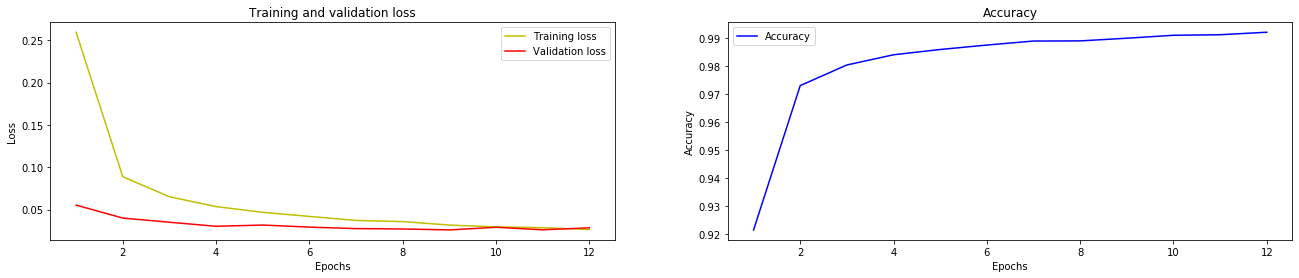

In [14]:
import matplotlib.pyplot as plt7
%matplotlib inline

acc = history.history['acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')


plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.show()

plt.subplot(1, 2, 2)

plt.plot(epochs, acc, 'b', label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.subplots_adjust( right=3)
plt.legend()
plt.show()


In [15]:
# model.save('cnn-keras=official-9909-12e.model')